In [1]:
import os 

initial_path = r"Z:\People\Jake\Histology\GluA2"

mouse = "JJ002"

mouse_path = os.path.join(initial_path, mouse)
image_file_path = os.path.join(mouse_path, "QProject", "exported_tiffs")
json_file_path = os.path.join(mouse_path, "abbaProject", "atlas_json")

# Get all of the json file names
fnames = next(os.walk(json_file_path))[2]

print(fnames)

['slice_01_downsampled.geojson', 'slice_02_downsampled.geojson', 'slice_03_downsampled.geojson', 'slice_04_downsampled.geojson', 'slice_05_downsampled.geojson', 'slice_06_downsampled.geojson', 'slice_07_downsampled.geojson', 'slice_08_downsampled.geojson', 'slice_09_downsampled.geojson', 'slice_10_downsampled.geojson', 'slice_11_downsampled.geojson', 'slice_12_downsampled.geojson', 'slice_13_downsampled.geojson', 'slice_14_downsampled.geojson', 'slice_15_downsampled.geojson', 'slice_16_downsampled.geojson', 'slice_17_downsampled.geojson', 'slice_22_downsampled.geojson', 'slice_23_downsampled.geojson', 'slice_24_downsampled.geojson', 'slice_25_downsampled.geojson', 'slice_26_downsampled.geojson', 'slice_27_downsampled.geojson', 'slice_28_downsampled.geojson', 'slice_29_downsampled.geojson', 'slice_30_downsampled.geojson', 'slice_31_downsampled.geojson']


In [2]:
base_fnames = [x.split(".")[0] for x in fnames]

print(base_fnames)

['slice_01_downsampled', 'slice_02_downsampled', 'slice_03_downsampled', 'slice_04_downsampled', 'slice_05_downsampled', 'slice_06_downsampled', 'slice_07_downsampled', 'slice_08_downsampled', 'slice_09_downsampled', 'slice_10_downsampled', 'slice_11_downsampled', 'slice_12_downsampled', 'slice_13_downsampled', 'slice_14_downsampled', 'slice_15_downsampled', 'slice_16_downsampled', 'slice_17_downsampled', 'slice_22_downsampled', 'slice_23_downsampled', 'slice_24_downsampled', 'slice_25_downsampled', 'slice_26_downsampled', 'slice_27_downsampled', 'slice_28_downsampled', 'slice_29_downsampled', 'slice_30_downsampled', 'slice_31_downsampled']


In [3]:
image_fnames = [x + ".tif" for x in base_fnames]

print(image_fnames)

['slice_01_downsampled.tif', 'slice_02_downsampled.tif', 'slice_03_downsampled.tif', 'slice_04_downsampled.tif', 'slice_05_downsampled.tif', 'slice_06_downsampled.tif', 'slice_07_downsampled.tif', 'slice_08_downsampled.tif', 'slice_09_downsampled.tif', 'slice_10_downsampled.tif', 'slice_11_downsampled.tif', 'slice_12_downsampled.tif', 'slice_13_downsampled.tif', 'slice_14_downsampled.tif', 'slice_15_downsampled.tif', 'slice_16_downsampled.tif', 'slice_17_downsampled.tif', 'slice_22_downsampled.tif', 'slice_23_downsampled.tif', 'slice_24_downsampled.tif', 'slice_25_downsampled.tif', 'slice_26_downsampled.tif', 'slice_27_downsampled.tif', 'slice_28_downsampled.tif', 'slice_29_downsampled.tif', 'slice_30_downsampled.tif', 'slice_31_downsampled.tif']


In [4]:
i = 0

In [5]:
image_file = base_fnames[i] + ".tif"
json_file = fnames[i]

In [6]:
from skimage import io as sio
current_image = sio.imread(
                os.path.join(image_file_path, image_file), plugin="tifffile"
            )

C:\Users\Jake\AppData\Local\Temp\ipykernel_27308\1800907092.py:2: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  current_image = sio.imread(


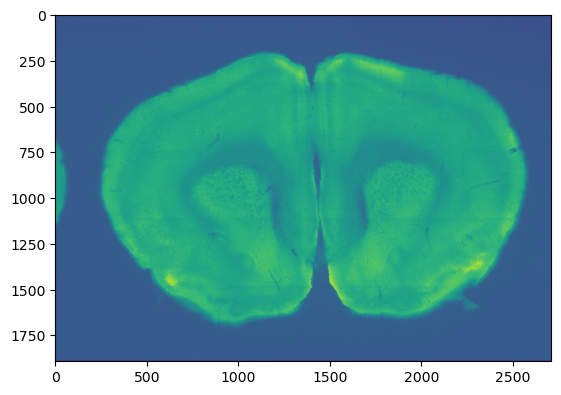

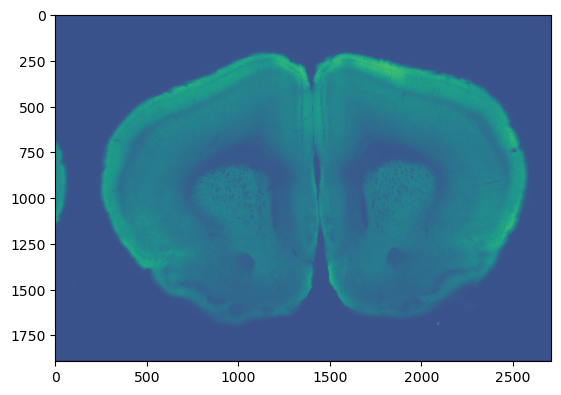

In [7]:
import matplotlib.pyplot as plt
plt.figure()
im1 = plt.imshow(current_image[:, :, 2])
plt.figure()
im2 = plt.imshow(current_image[:, :, 3])

In [8]:
current_image.shape

(1892, 2710, 4)

In [9]:
def normalize_image(image, correction, slope):
    """Helper function to normalize images"""

    # Correct for baseline fluorescence
    corrected_image = image - correction
    normalized_image = corrected_image / slope

    return normalized_image

In [10]:
PULSE_CORRECTION = 67.7
PULSE_SLOPE = 1169.1
CHASE_CORRECTION = 67.7
CHASE_SLOPE = 1169.1

image_file = current_image

# Seperate the image channels
chase_image = image_file[:, :, 2]
pulse_image = image_file[:, :, 3]

In [11]:
chase_norm = normalize_image(chase_image, CHASE_CORRECTION, CHASE_SLOPE)
pulse_norm = normalize_image(pulse_image, PULSE_CORRECTION, PULSE_SLOPE)

In [12]:
import numpy as np
chase_norm[chase_norm < 0] = np.nan
pulse_norm[pulse_norm < 0] = np.nan

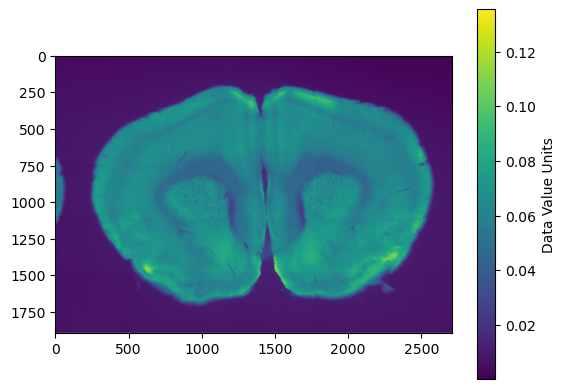

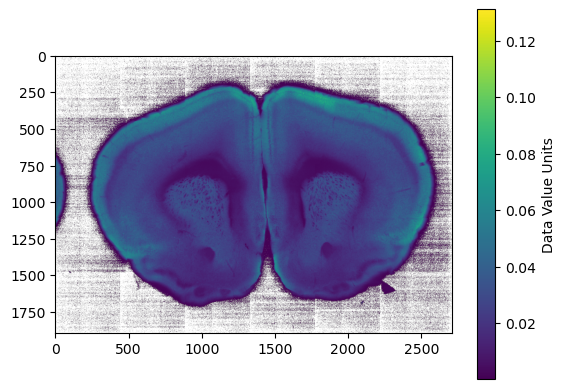

In [13]:
plt.figure()
im1= plt.imshow(chase_norm[:, :])
plt.colorbar(im1, label='Data Value Units')
plt.figure()
im2 = plt.imshow(pulse_norm[:, :])
plt.colorbar(im2, label='Data Value Units')

In [14]:
import numpy as np
esp = 1e-9
TIME_CONSTANT = 3
total_protein = chase_norm + pulse_norm
fraction_ratio = pulse_norm + total_protein
fraction_ratio = fraction_ratio + esp

# Calculate the lifetime
lifetime = np.absolute(TIME_CONSTANT / (np.log(1 / fraction_ratio)))

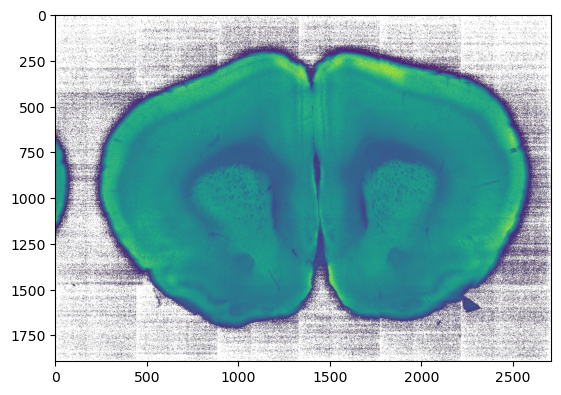

In [15]:
plt.figure()
plt.imshow(lifetime)

In [16]:
full_image = np.dstack([pulse_norm, chase_norm, lifetime])

In [17]:
full_image.shape

(1892, 2710, 3)

In [18]:
from organize_roi_features import extract_roi_values

In [19]:
import json
current_atlas = json.load(
                open(os.path.join(json_file_path, json_file), "r")
            )

In [20]:
roi_df = extract_roi_values(full_image, current_atlas)

In [32]:
roi_df

,level,roi_name,side,parent_name,orig_id,parent_id,n_pixels,mean_pulse,mean_chase,mean_lifetime
0,leaf,ACAd_1,L,ACAd,935,39,9654,0.043008,0.058924,1.549888
1,leaf,ACAd_1,R,ACAd,935,39,9692,0.044483,0.061289,1.581906
2,leaf,ACAd_2/3,L,ACAd,211,39,9839,0.038149,0.065792,1.537542
3,leaf,ACAd_2/3,R,ACAd,211,39,10062,0.038615,0.066879,1.548847
4,leaf,ACAd_5,L,ACAd,1015,39,20693,0.032267,0.066927,1.478491
...,...,...,...,...,...,...,...,...,...,...
164,parent,CH,R,grey,567,8,1289433,0.027632,0.063787,1.407690
165,parent,grey,L,root,8,997,1261097,0.028849,0.064377,1.424972
166,parent,grey,R,root,8,997,1289433,0.027632,0.063787,1.407690
167,parent,root,L,None,997,<NA>,1341258,0.027618,0.063286,1.404339


In [33]:
import pandas as pd
new_df = pd.concat([roi_df, roi_df], ignore_index=True)

In [35]:
combined_df = new_df.groupby(
            by=["level", "roi_name", "side", "parent_name", "orig_id", "parent_id"],
            as_index=False,
        ).agg(
            tot_pixels=("n_pixels", "sum"),
            mean_pulse=("mean_pulse", "mean"),
            mean_chase=("mean_chase", "mean"),
            mean_lifetime=("mean_lifetime", "mean"),
        )

In [36]:
combined_df

,level,roi_name,side,parent_name,orig_id,parent_id,tot_pixels,mean_pulse,mean_chase,mean_lifetime
0,leaf,ACAd_1,L,ACAd,935,39,19308,0.043008,0.058924,1.549888
1,leaf,ACAd_1,R,ACAd,935,39,19384,0.044483,0.061289,1.581906
2,leaf,ACAd_2/3,L,ACAd,211,39,19678,0.038149,0.065792,1.537542
3,leaf,ACAd_2/3,R,ACAd,211,39,20124,0.038615,0.066879,1.548847
4,leaf,ACAd_5,L,ACAd,1015,39,41386,0.032267,0.066927,1.478491
...,...,...,...,...,...,...,...,...,...,...
162,parent,STRv,R,STR,493,477,348426,0.019361,0.066618,1.330607
163,parent,TT,L,OLF,589,698,70068,0.023352,0.059281,1.334989
164,parent,TT,R,OLF,589,698,71086,0.024711,0.060245,1.355821
165,parent,grey,L,root,8,997,2522194,0.028849,0.064377,1.424972


In [ ]:
properties

In [ ]:
area

In [ ]:
side

In [ ]:
from collections import defaultdict
import pandas as pd


id_to_feat = {}
parent_to_children = defaultdict(list)
id_to_name = {}

rows_meta = []

# Iterate through each atlas feature
for feature in features:
    properties = feature.get("properties") or {}
    measurements = properties.get("measurements") or {}
    orig_id = measurements.get("ID")
    parent_id = measurements.get("Parent ID")
    # Parse altas area name and hemisphere
    area, side = parse_area_side(properties)
    ## Get base area name and determine if it is a layer
    base = normalize_name(area)
    # Name map from ALL features
    if orig_id is not None:
        id_to_feat[orig_id] = feature
        id_to_name[orig_id] = base
    if parent_id is not None:
        parent_to_children[parent_id].append(orig_id)


    rows_meta.append(
        {
            "orig_id": orig_id,
            "parent_id": parent_id,
            "roi_name": base,
            "side": side,
        }
    )

meta_df = pd.DataFrame(rows_meta)
meta_df["orig_id"] = meta_df["orig_id"].astype("Int64")
meta_df["parent_id"] = meta_df["parent_id"].astype("Int64")

all_ids = set(id_to_feat.keys())
parent_ids = set(parent_to_children.keys())
leaf_ids = all_ids - parent_ids

In [ ]:
meta_df

In [ ]:
leaf_ids

In [ ]:
meta_df["leaf_ids"] = 